In [1]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn import preprocessing
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D, proj3d

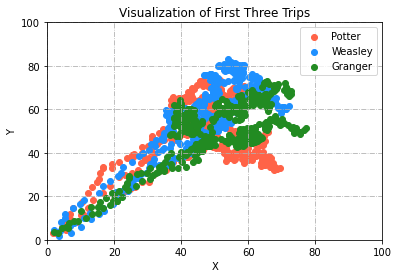

In [14]:
# extract "close" and "far" data frame
proj_df = pd.read_csv("data_proj_414.csv")
close_df = proj_df.loc[proj_df["Close"]>0,["X","Y","Close"]]
far_df = proj_df.loc[proj_df["Far"]>0,["X","Y","Far"]]
frames = [close_df, far_df]
both_df = pd.concat(frames)

# extract data frame of each person
Potter_df = proj_df.loc[(proj_df["Potter"]>0) & (proj_df["Trip"]<4),["X","Y"]]
Weasley_df = proj_df.loc[(proj_df["Weasley"]>0)& (proj_df["Trip"]<4),["X","Y"]]
Granger_df = proj_df.loc[(proj_df["Granger"]>0)& (proj_df["Trip"]<4),["X","Y"]]

plt.xlim(0,100)
plt.ylim(0,100)
plt.scatter(Potter_df["X"],Potter_df["Y"],color = "tomato",label="Potter")
plt.scatter(Weasley_df["X"],Weasley_df["Y"],color = "dodgerblue",label="Weasley")
plt.scatter(Granger_df["X"],Granger_df["Y"],color = "forestgreen",label="Granger")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(linestyle='-.')
plt.legend(loc='upper right')
plt.title("Visualization of First Three Trips")
plt.savefig('Visualization of First Three Trips.png',dpi=1000)

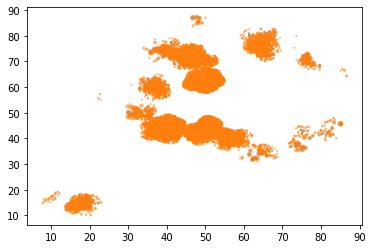

In [3]:
plt.scatter(close_df["X"], close_df["Y"], s=close_df["Close"], alpha = 0.5)
plt.savefig('test.png', dpi = 2000)

plt.scatter(far_df["X"], far_df["Y"], s=far_df["Far"], alpha = 0.5)
plt.savefig('test1.png', dpi = 2000)

No handles with labels found to put in legend.


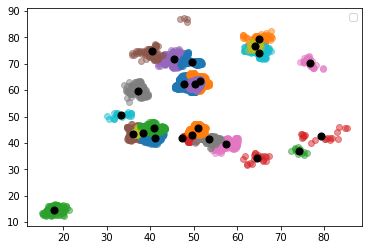

In [4]:
# K-means
kmeans = KMeans(n_clusters=25, init='k-means++', random_state=98)
label = kmeans.fit_predict(close_df)

#Getting the Centroids
centroids = kmeans.cluster_centers_

#Getting unique labels
u_labels = np.unique(label)+1

for i in u_labels:
    plt.scatter(close_df[label == i]["X"] , close_df[label == i]["Y"], cmap = "jet",alpha = 0.5)

plt.scatter(centroids[:,0] , centroids[:,1] , s = 50, color = 'k')
plt.legend()
plt.show()
    
# def plot_cluster(num):
#     kmeans_df = close_df.loc[close_df["cluster"]==num]
#     plt.scatter(kmeans_df["X"],kmeans_df["Y"])

# plot_cluster(1)